# Promena palete scene

In [33]:
# Prvo učitavam potrebne biblioteke

import matplotlib.pyplot as plt
import numpy as np
import cv2

### Učitavanje i obrada resursa

In [55]:
# Učitavam slike na kojima ću vršiti obradu

ref = cv2.imread('Slike/dolina.png')
fin = cv2.imread('Slike/mountains.png')


In [76]:
# Kako pyhton ucitava slike kao matrice, a vrednosti boja kao niz vrednost Blue,Green,Red konvertujemo ih u RGB niz

ref = cv2.cvtColor(ref,cv2.COLOR_BGR2RGB)
fin = cv2.cvtColor(fin,cv2.COLOR_BGR2RGB)

### Razdvajanje 3 kanala za 3 boje na ref. slici

In [78]:
# Delimo 1. sliku na 3 kanala

ref_r = ref[:,:,0] # img_dolina je trodimenzionalna matrica, te u img_golina_r kopiramo za svaki piksel vrednost RED kanala (img_dolina_r je sada dvodim. matrica)
# svaka vrednost u matrici img_dolina je niz od 3 vrednosti - vrednosti RGB boja od 0 do 255 po pikselu
# svaka vrednost u matrici imd_dolina_r je 1 vrednost - vrednost crvene boje za svaki piksel iz img_dolina
# svaka vrednost u matrici imd_dolina_g je 1 vrednost - vrednost zelene boje za svaki piksel iz img_dolina
# svaka vrednost u matrici imd_dolina_b je 1 vrednost - vrednost plave zelene za svaki piksel iz img_dolina

ref_g = ref[:,:,1]
ref_b = ref[:,:,2]

fig, ax = plt.subplots(1,4,figsize=(32,22))
ax[0].imshow(ref)
ax[0].axis('off')
ax[0].set_title('Slika u tri dimenzije (RGB)')
ax[1].imshow(ref_r,cmap='jet')
ax[1].axis('off')
ax[1].set_title('Slika u jednoj boji RED')
ax[2].imshow(ref_g,cmap='jet')
ax[2].axis('off')
ax[2].set_title('Slika u jednoj boji GREEN')
ax[3].imshow(ref_b,cmap='jet')
ax[3].axis('off')
ax[3].set_title('Slika u jednoj boji BLUE')

Text(0.5, 1.0, 'Slika u jednoj boji BLUE')

### Racunanje i prikaz normalizovanog i kumulativnog histograma svakog kanala ref. slike

Text(0.5, 1.0, 'kumulativni histogram BLUE')

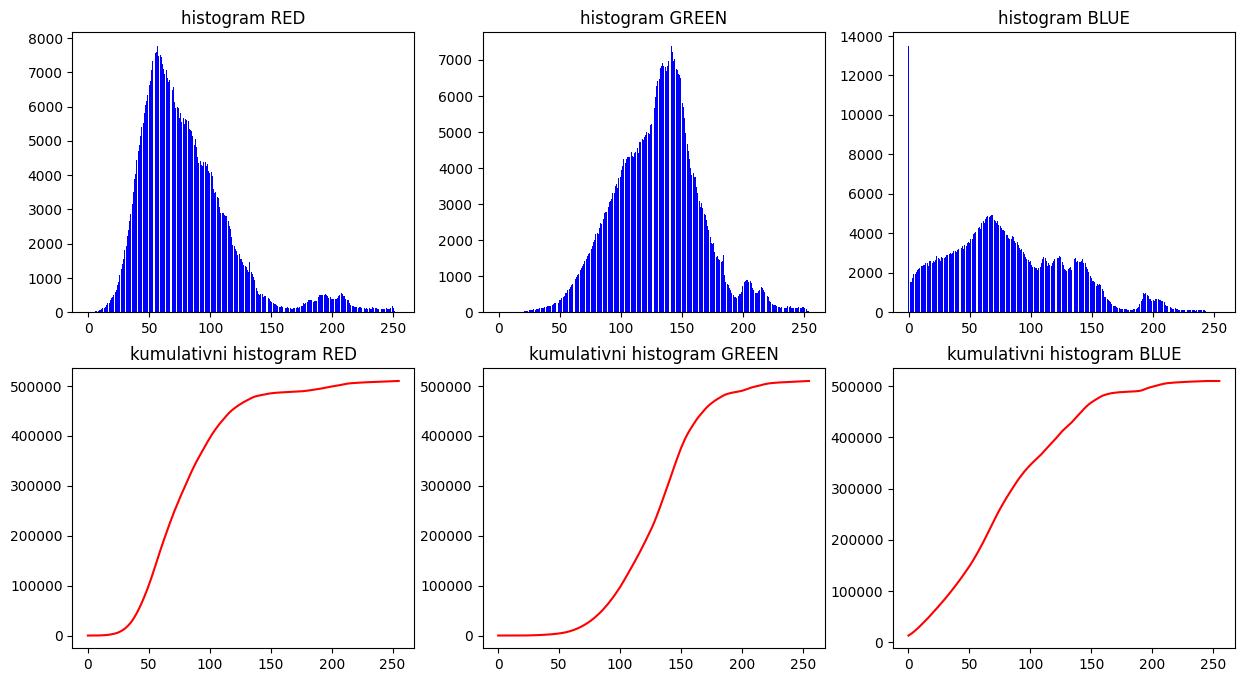

In [88]:
# histogram je grafički prikaz zastupljenosti podatka u nekom datasetu
# u našim slikama (matricama) su zastupljene vrednosti od 0 do 255
# koristimo histograme da prikažemo zastupljenosti tih vrednosti u matrici (koliko piksela ima vred crvene boje 255, koliko 0, koliko ...)
# funkcija np.histogram radi samo na nizovima te na matricu image_dolina_r izvrsavamo metodu flatten() koja ce nadovezati redove jedne na druge

## STA SE DESAVA sA HIStOGRAMOM RGB SLIKE?????
fig, ax = plt.subplots(2,3,figsize=(15,8))

hist_r_r, bin_edges1 = np.histogram(ref_r.flatten(), bins=256, range = (0,255))
hist_r_g, bin_edges2 = np.histogram(ref_g.flatten(), bins=256, range = (0,255))
hist_r_b, bin_edges3 = np.histogram(ref_b.flatten(), bins=256, range = (0,255))

# generisem kumulativni histogram za svaki kanal - integral za histogram svakog kanala

cdf_r_r = np.cumsum(hist_r_r)
cdf_r_g = np.cumsum(hist_r_g)
cdf_r_b = np.cumsum(hist_r_b)


ax[0,0].bar(bin_edges1[0:-1], hist_r_r, color= 'b')
ax[0,0].set_title('histogram RED')
ax[0,1].bar(bin_edges1[0:-1], hist_r_g, color= 'b')
ax[0,1].set_title('histogram GREEN')
ax[0,2].bar(bin_edges1[0:-1], hist_r_b, color= 'b')
ax[0,2].set_title('histogram BLUE')


ax[1,0].plot(cdf_r_r,color='r')
ax[1,0].set_title('kumulativni histogram RED')
ax[1,1].plot(cdf_r_g,color='r')
ax[1,1].set_title('kumulativni histogram GREEN')
ax[1,2].plot(cdf_r_b,color='r')
ax[1,2].set_title('kumulativni histogram BLUE')

#### Ponavljanje postupka na drugoj slici

Text(0.5, 1.0, 'Slika u jednoj boji BLUE')

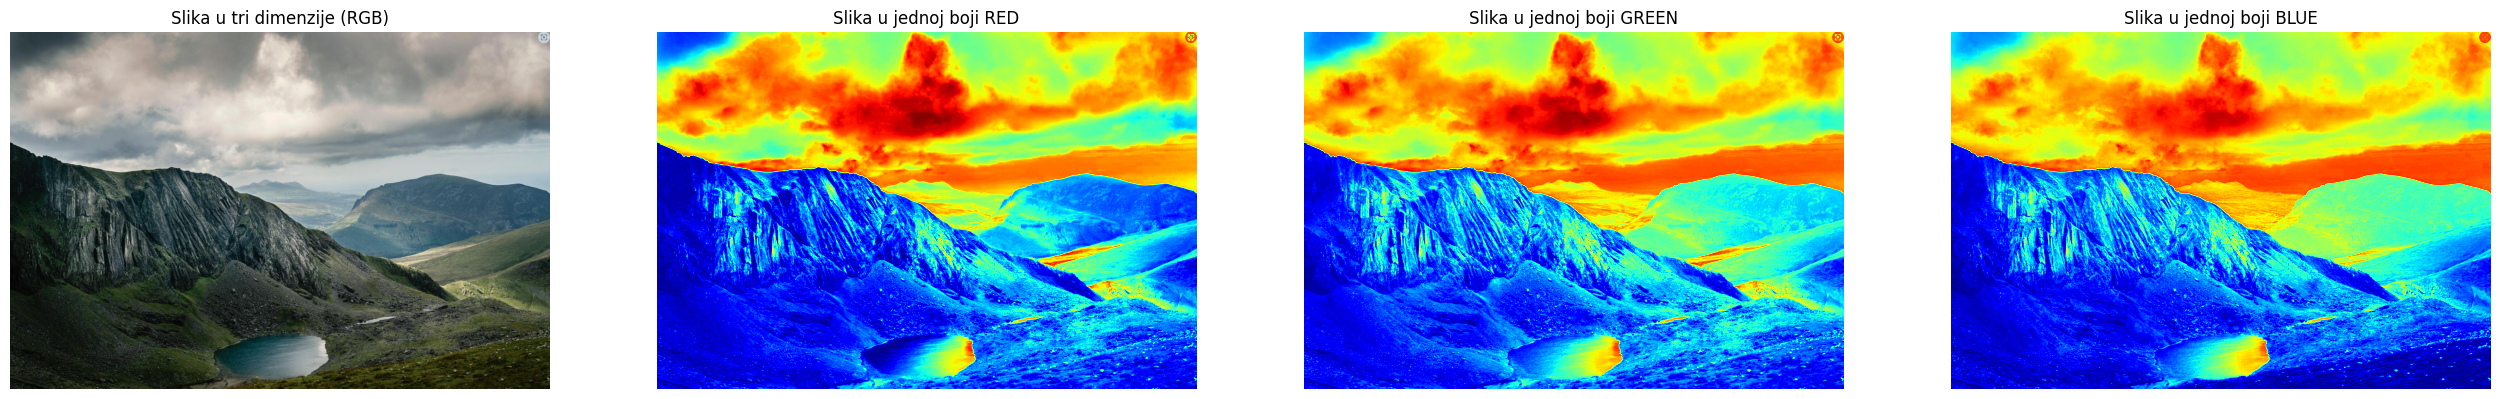

In [82]:
# Ponavljamo postupak razdvajanja kanala za sliku koju menjamo


fin_r = fin[:,:,0]
fin_g = fin[:,:,1]
fin_b = fin[:,:,2]


fig, ax = plt.subplots(1,4,figsize=(32,22))
ax[0].imshow(fin)
ax[0].axis('off')
ax[0].set_title('Slika u tri dimenzije (RGB)')
ax[1].imshow(fin_r,cmap='jet')
ax[1].axis('off')
ax[1].set_title('Slika u jednoj boji RED')
ax[2].imshow(fin_g,cmap='jet')
ax[2].axis('off')
ax[2].set_title('Slika u jednoj boji GREEN')
ax[3].imshow(fin_b,cmap='jet')
ax[3].axis('off')
ax[3].set_title('Slika u jednoj boji BLUE')

# ?????

Text(0.5, 1.0, 'histogram BLUE')

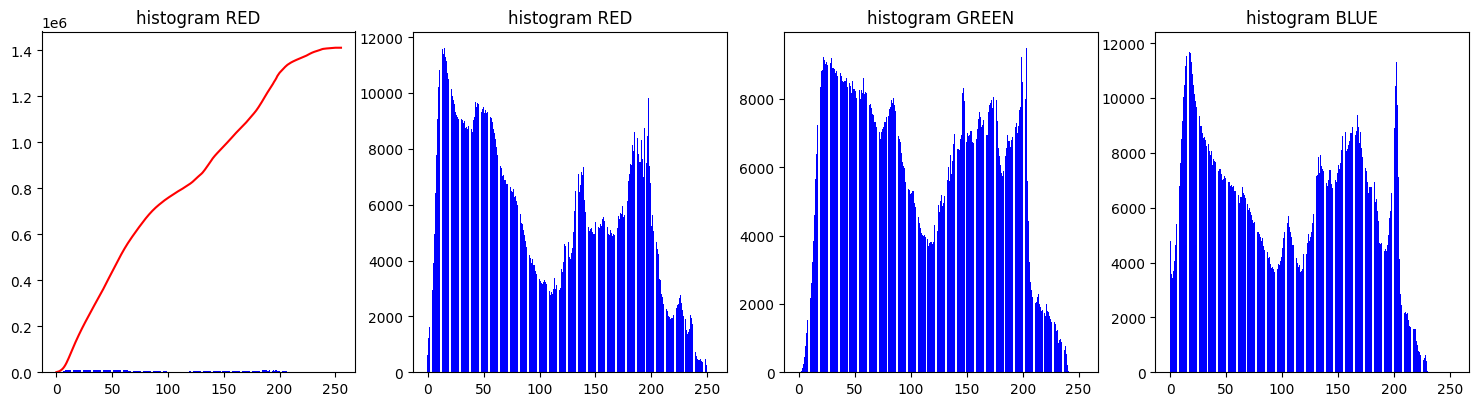

In [95]:
# Ponavljamo postupak generisanja histograma za svaki kanal slike

fig, ax = plt.subplots(1,4,figsize=(15,4))
fig.tight_layout()

hist_f_r, bin_edges1 = np.histogram(fin_r.flatten(), bins=256, range = (0,255))
hist_f_g, bin_edges2 = np.histogram(fin_g.flatten(), bins=256, range = (0,255))
hist_f_b, bin_edges3 = np.histogram(fin_b.flatten(), bins=256, range = (0,255))

cdf_f_r = np.cumsum(hist_f_r)
cdf_f_g = np.cumsum(hist_f_g)
cdf_f_b = np.cumsum(hist_f_b)


#ax[0].bar(bin_edges1, hist_f_r/hist_f_r.max(), color='blue')
#ax[0].plot(bin_edges1,cdf_f_r,color='r')
ax[0].bar(bin_edges1[0:-1], hist_f_r, color= 'b')
ax[0].plot(cdf_f_r,color='r')
ax[0].set_title('histogram RED')
ax[1].bar(bin_edges1[0:-1], hist_f_r, color= 'b')
ax[1].set_title('histogram RED')
ax[2].bar(bin_edges1[0:-1], hist_f_g, color= 'b')
ax[2].set_title('histogram GREEN')
ax[3].bar(bin_edges1[0:-1], hist_f_b, color= 'b')
ax[3].set_title('histogram BLUE')

### Dalja obrada kumulativnih histograma ???

Text(0.5, 1.0, 'B')

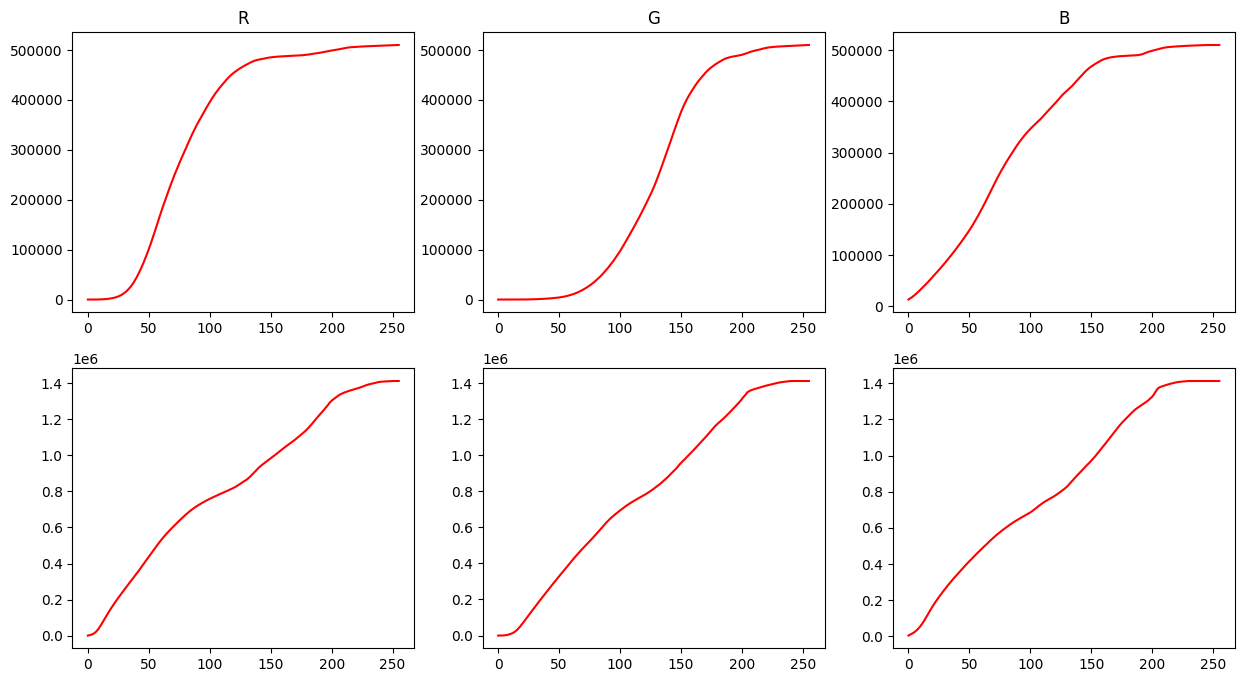

In [92]:

fig, ax = plt.subplots(2,3,figsize=(15,8))

ax[0,0].plot(cdf_r_r,color='r')
ax[0,1].plot(cdf_r_g,color='r')
ax[0,2].plot(cdf_r_b,color='r')
ax[1,0].plot(cdf_f_r,color='r')
ax[1,1].plot(cdf_f_g,color='r')
ax[1,2].plot(cdf_f_b,color='r')

ax[0,0].set_title('R')
ax[0,1].set_title('G')
ax[0,2].set_title('B')